## DAE_EMT_VS_RLC1

### Import dpsimpy

In [1]:
import sys
sys.path.insert(0,'/dpsim/build')
#sys.path.remove('/dpsim/build')
print(sys.path)
import dpsimpy
#print(dpsimpy.__file__)

['/dpsim/build', '/dpsim/examples/Notebooks/DAE', '/usr/lib64/python39.zip', '/usr/lib64/python3.9', '/usr/lib64/python3.9/lib-dynload', '', '/usr/local/lib64/python3.9/site-packages', '/usr/local/lib/python3.9/site-packages', '/usr/lib64/python3.9/site-packages', '/usr/lib/python3.9/site-packages']


### Parameters

In [2]:
resistance = 10;
inductance = 1e-3;
capacitance = 5e-6;

### Powerflow for Initialization

In [3]:
sim_name_pf = 'DAE_VS_RLC1_PF'
dpsimpy.Logger.set_log_dir("logs/" + sim_name_pf)

# Nodes
gnd_pf = dpsimpy.sp.SimNode.gnd
n1_pf  = dpsimpy.sp.SimNode('n1_pf')
n2_pf  = dpsimpy.sp.SimNode('n2_pf')
n3_pf  = dpsimpy.sp.SimNode('n3_pf')

# Components
vs_pf = dpsimpy.sp.ph1.VoltageSource('vs_pf', dpsimpy.LogLevel.debug)
vs_pf.set_parameters(V_ref=complex(10,0), f_src=50)
r1_pf = dpsimpy.sp.ph1.Resistor('r1_pf', dpsimpy.LogLevel.debug)
r1_pf.set_parameters(R=resistance)
c1_pf = dpsimpy.sp.ph1.Capacitor('c1_pf', dpsimpy.LogLevel.debug)
c1_pf.set_parameters(C=capacitance)
l1_pf = dpsimpy.sp.ph1.Inductor('l1_pf', dpsimpy.LogLevel.debug)
l1_pf.set_parameters(L=inductance)

# Connections
vs_pf.connect([gnd_pf, n1_pf])
r1_pf.connect([n2_pf, n1_pf])
l1_pf.connect([n3_pf, n2_pf])
c1_pf.connect([gnd_pf, n3_pf])

# Define system topology
system_pf = dpsimpy.SystemTopology(50, [n1_pf, n2_pf, n3_pf], [vs_pf, r1_pf, l1_pf, c1_pf])

# Logging
logger_pf = dpsimpy.Logger(sim_name_pf)
logger_pf.log_attribute('n1.v', 'v', n1_pf)
logger_pf.log_attribute('n2.v', 'v', n2_pf)
logger_pf.log_attribute('n3.v', 'v', n3_pf)
logger_pf.log_attribute('r1.i_intf', 'i_intf', r1_pf)
logger_pf.log_attribute('l1.i_intf', 'i_intf', l1_pf)

sim_pf = dpsimpy.Simulation(sim_name_pf, dpsimpy.LogLevel.debug)
sim_pf.set_system(system_pf)
sim_pf.set_domain(dpsimpy.Domain.SP)
sim_pf.set_time_step(0.1)
sim_pf.set_final_time(0.5)
sim_pf.add_logger(logger_pf)
sim_pf.run()

[12:34:20.571947 DAE_VS_RLC1_PF info] Initialize simulation: DAE_VS_RLC1_PF
[12:34:20.572094 MnaSolverFactory info] creating EigenDense solver implementation
[12:34:20.572934 DAE_VS_RLC1_PF info] Scheduling tasks.
[12:34:20.573373 DAE_VS_RLC1_PF info] Scheduling done.
[12:34:20.573377 DAE_VS_RLC1_PF info] Opening interfaces.
[12:34:20.573382 DAE_VS_RLC1_PF info] Start synchronization with remotes on 0 interfaces
[12:34:20.573383 DAE_VS_RLC1_PF info] Synchronized simulation start with remotes
[12:34:20.573386 DAE_VS_RLC1_PF info] Start simulation: DAE_VS_RLC1_PF
[12:34:20.573389 DAE_VS_RLC1_PF info] Time step: 1.000000e-01
[12:34:20.573392 DAE_VS_RLC1_PF info] Final time: 5.000000e-01
[12:34:20.573786 DAE_VS_RLC1_PF info] Simulation calculation time: 0.000389
[12:34:20.573818 DAE_VS_RLC1_PF info] Simulation finished.


### DPsim EMT

In [9]:
# DPsim EMT simulation
name = 'DAE_VS_RLC1'
dpsimpy.Logger.set_log_dir("logs/" + name)
timeStep = 0.0001;

# absolute tolerances
voltage_tol = 1e-8
current_tol = 1e-8
    
# Nodes
gnd = dpsimpy.emt.SimNode.gnd
n1 = dpsimpy.emt.SimNode('n1', dpsimpy.PhaseType.Single) 
n1.set_initial_voltage(sim_pf.get_idobj_attr(n1_pf.name(), 'v').get()[0][0])
n1.dae_set_abs_tolerance(voltage_tol)
n2 = dpsimpy.emt.SimNode('n2', dpsimpy.PhaseType.Single)
n2.set_initial_voltage(sim_pf.get_idobj_attr(n2_pf.name(), 'v').get()[0][0])
n2.dae_set_abs_tolerance(voltage_tol)
n3 = dpsimpy.emt.SimNode('n3', dpsimpy.PhaseType.Single) 
n3.set_initial_voltage(sim_pf.get_idobj_attr(n3_pf.name(), 'v').get()[0][0])
n3.dae_set_abs_tolerance(voltage_tol)

# Components
vs = dpsimpy.emt.ph1.VoltageSource('vs')
vs.set_parameters(V_ref=complex(10,0),f_src=50)
vs.dae_set_abs_tolerance(voltage_tol)
r1 = dpsimpy.emt.ph1.Resistor('r1')
r1.set_parameters(R=resistance)
r1.dae_set_abs_tolerance(voltage_tol)
c1 = dpsimpy.emt.ph1.Capacitor('c1')
c1.set_parameters(C=capacitance)
l1 = dpsimpy.emt.ph1.Inductor('l1')
l1.set_parameters(L=inductance)
l1.dae_set_abs_tolerance(current_tol)

# Connections
vs.connect([gnd, n1])
r1.connect([n2, n1])
l1.connect([n3, n2])
c1.connect([gnd, n3])

# Define system topology
system = dpsimpy.SystemTopology(50, [n1, n2, n3], [vs, r1, l1, c1])

# Logging
logger = dpsimpy.Logger(name)
logger.log_attribute('n1.v', 'v', n1)
logger.log_attribute('n2.v', 'v', n2)
logger.log_attribute('n3.v', 'v', n3)
logger.log_attribute('vs', 'v_intf', vs);
logger.log_attribute('vl', 'v_intf', l1);
logger.log_attribute('vc', 'v_intf', c1);
logger.log_attribute('dvc', 'dv_intf', c1);
logger.log_attribute('vr', 'v_intf', r1);
logger.log_attribute('i', 'i_intf', l1);
logger.log_attribute('di', 'di_intf', l1);

sim = dpsimpy.Simulation(name, dpsimpy.LogLevel.debug)
sim.set_system(system)
sim.set_solver(dpsimpy.Solver.DAE)
sim.set_domain(dpsimpy.Domain.EMT)
sim.set_min_step_size(1e-6)
sim.set_max_step_size(1e-4)
sim.set_relative_rolerance(1e-4)
sim.set_time_step(timeStep)
sim.set_final_time(0.1)
sim.add_logger(logger)
vs.set_initial_current(sim_pf.get_idobj_attr(r1_pf.name(), 'i_intf').get());    
sim.run()

[12:34:41.981731 DAE_VS_RLC1 info] Initialize simulation: DAE_VS_RLC1
[12:34:41.982434 DAE_VS_RLC1 info] Scheduling tasks.
[12:34:41.982801 DAE_VS_RLC1 info] Scheduling done.
[12:34:41.982804 DAE_VS_RLC1 info] Opening interfaces.
[12:34:41.982808 DAE_VS_RLC1 info] Start synchronization with remotes on 0 interfaces
[12:34:41.982809 DAE_VS_RLC1 info] Synchronized simulation start with remotes
[12:34:41.982812 DAE_VS_RLC1 info] Start simulation: DAE_VS_RLC1
[12:34:41.982816 DAE_VS_RLC1 info] Time step: 1.000000e-04
[12:34:41.982818 DAE_VS_RLC1 info] Final time: 1.000000e-01
[12:34:42.063304 DAE_VS_RLC1 info] Simulation calculation time: 0.080482
[12:34:42.063438 DAE_VS_RLC1 info] Simulation finished.


### Read Results DPSim

In [10]:
# read Simulink log file

import matplotlib.pyplot as plt
import villas.dataprocessing.readtools as rt
import os

# read EMT results
file_path = os.getcwd() + "/logs/DAE_VS_RLC1/DAE_VS_RLC1.csv"
ts_dpsim_emt = rt.read_timeseries_dpsim(file_path)

column number: 10
results length: 1000
real column names: ['di', 'dvc', 'i', 'n1.v', 'n2.v', 'n3.v', 'vc', 'vl', 'vr', 'vs']
complex column names: []


### Read Modelica Results

In [11]:
import urllib.request
url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/-/raw/18f44dab4b5193855d0c1712dcb98064257e6aee/Modelica/BasicGrids/VS_RLC1.csv'
local_file = 'Results_DAE_EMT_VS_RLC1_Modelica.csv'
urllib.request.urlretrieve(url, local_file) 
ts_modelica_emt = rt.read_timeseries_dpsim(local_file)

column number: 7
results length: 402
real column names: ['voltageSource.v', 'resistor.v', 'inductor.v', 'capacitor.v', 'der(capacitor.v)', 'inductor.i', 'der(voltageSource.i)']
complex column names: []


### Plot Results DPSim

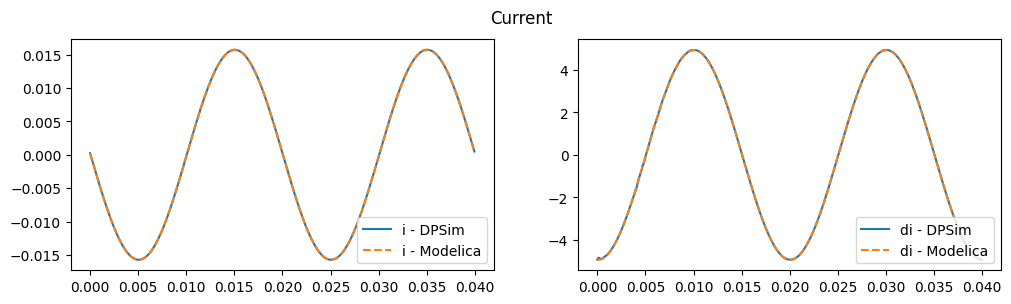

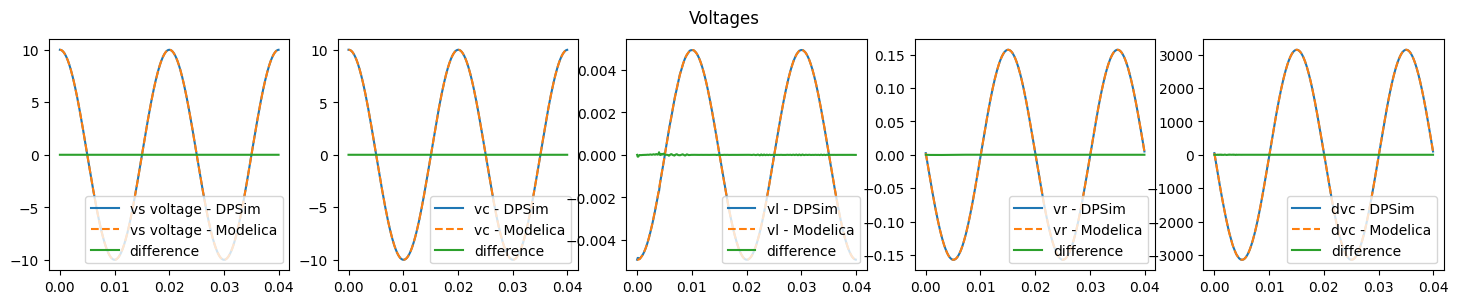

In [25]:
# define region of interest
common_time = 50e-6
roi_start = 0
roi_end = 0.04
roi = range(int(roi_start/common_time), int(roi_end/common_time))

# current 
width = 12
height = 3
fig = plt.figure(figsize=(width, height))
fig.suptitle('Current', fontsize=12)
plt.subplot(1, 2, 1)
plt.plot(ts_dpsim_emt['i'].interpolate(common_time).time[roi], ts_dpsim_emt['i'].interpolate(common_time).values[roi], label='i - DPSim')
plt.plot(ts_modelica_emt['inductor.i'].interpolate(common_time).time[roi], ts_modelica_emt['inductor.i'].interpolate(common_time).values[roi], '--', label='i - Modelica')

plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(ts_dpsim_emt['di'].interpolate(common_time).time[roi], ts_dpsim_emt['di'].interpolate(common_time).values[roi], label='di - DPSim')
plt.plot(ts_modelica_emt['der(voltageSource.i)'].interpolate(common_time).time[roi], -ts_modelica_emt['der(voltageSource.i)'].interpolate(common_time).values[roi], '--', label='di - Modelica')
plt.legend(loc='lower right')

# component voltages 
width = 18
height = 3
fig = plt.figure(figsize=(width, height))
fig.suptitle('Voltages', fontsize=12)
plt.subplot(1, 5, 1)
plt.plot(ts_dpsim_emt['vs'].interpolate(common_time).time[roi], ts_dpsim_emt['vs'].interpolate(common_time).values[roi], label='vs voltage - DPSim')
plt.plot(ts_modelica_emt['voltageSource.v'].interpolate(common_time).time[roi], ts_modelica_emt['voltageSource.v'].interpolate(common_time).values[roi], '--', label='vs voltage - Modelica')
plt.plot(ts_modelica_emt['voltageSource.v'].interpolate(common_time).time[roi], ts_modelica_emt['voltageSource.v'].interpolate(common_time).values[roi] - ts_dpsim_emt['vs'].interpolate(common_time).values[roi], label='difference')
plt.legend(loc='lower right')
plt.subplot(1, 5, 2)
plt.plot(ts_dpsim_emt['vc'].interpolate(common_time).time[roi], ts_dpsim_emt['vc'].interpolate(common_time).values[roi], label='vc - DPSim')
plt.plot(ts_modelica_emt['capacitor.v'].interpolate(common_time).time[roi], ts_modelica_emt['capacitor.v'].interpolate(common_time).values[roi], '--', label='vc - Modelica')
plt.plot(ts_modelica_emt['capacitor.v'].interpolate(common_time).time[roi], ts_modelica_emt['capacitor.v'].interpolate(common_time).values[roi] - ts_dpsim_emt['vc'].interpolate(common_time).values[roi], label='difference')
plt.legend(loc='lower right')
plt.subplot(1, 5, 3)
plt.plot(ts_dpsim_emt['vl'].interpolate(common_time).time[roi], ts_dpsim_emt['vl'].interpolate(common_time).values[roi], label='vl - DPSim')
plt.plot(ts_modelica_emt['inductor.v'].interpolate(common_time).time[roi], ts_modelica_emt['inductor.v'].interpolate(common_time).values[roi], '--', label='vl - Modelica')
plt.plot(ts_modelica_emt['inductor.v'].interpolate(common_time).time[roi], ts_modelica_emt['inductor.v'].interpolate(common_time).values[roi] - ts_dpsim_emt['vl'].interpolate(common_time).values[roi], label='difference')
plt.legend(loc='lower right')
plt.subplot(1, 5, 4)
plt.plot(ts_dpsim_emt['vr'].interpolate(common_time).time[roi], ts_dpsim_emt['vr'].interpolate(common_time).values[roi], label='vr - DPSim')
plt.plot(ts_modelica_emt['resistor.v'].interpolate(common_time).time[roi], ts_modelica_emt['resistor.v'].interpolate(common_time).values[roi], '--', label='vr - Modelica')
plt.plot(ts_modelica_emt['inductor.v'].interpolate(common_time).time[roi], ts_modelica_emt['resistor.v'].interpolate(common_time).values[roi] - ts_dpsim_emt['vr'].interpolate(common_time).values[roi], label='difference')
plt.legend(loc='lower right')
plt.subplot(1, 5, 5)
plt.plot(ts_dpsim_emt['dvc'].interpolate(common_time).time[roi], ts_dpsim_emt['dvc'].interpolate(common_time).values[roi], label='dvc - DPSim')
plt.plot(ts_modelica_emt['der(capacitor.v)'].interpolate(common_time).time[roi], ts_modelica_emt['der(capacitor.v)'].interpolate(common_time).values[roi], '--', label='dvc - Modelica')
plt.plot(ts_modelica_emt['der(capacitor.v)'].interpolate(common_time).time[roi], ts_modelica_emt['der(capacitor.v)'].interpolate(common_time).values[roi] - ts_dpsim_emt['dvc'].interpolate(common_time).values[roi], label='difference')
plt.legend(loc='lower right')

### Assert

In [34]:
#compare voltages
time = ts_dpsim_emt['vs'].interpolate(common_time).time[roi]
dif_vs = ts_modelica_emt['voltageSource.v'].interpolate(common_time).values[roi] - ts_dpsim_emt['vs'].interpolate(common_time).values[roi]
dif_vr = ts_modelica_emt['resistor.v'].interpolate(common_time).values[roi] - ts_dpsim_emt['vr'].interpolate(common_time).values[roi]
dif_vl = ts_modelica_emt['inductor.v'].interpolate(common_time).values[roi] - ts_dpsim_emt['vl'].interpolate(common_time).values[roi]
dif_vc = ts_modelica_emt['capacitor.v'].interpolate(common_time).values[roi] - ts_dpsim_emt['vc'].interpolate(common_time).values[roi]
dif_dvc = ts_modelica_emt['der(capacitor.v)'].interpolate(common_time).values[roi] - ts_dpsim_emt['dvc'].interpolate(common_time).values[roi]

#compare current
dif_i = ts_modelica_emt['inductor.i'].interpolate(common_time).values[roi] - ts_dpsim_emt['i'].interpolate(common_time).values[roi]
dif_di = ts_modelica_emt['der(voltageSource.i)'].interpolate(common_time).values[roi] - ts_dpsim_emt['di'].interpolate(common_time).values[roi]

threashold_voltage = 0.001
threashold_dvoltage = 6
threashold_current = 0.0001
threashold_dcurrent = 10

import numpy as np
assert np.all(abs(dif_vs)<threashold_voltage)
assert np.all(abs(dif_vr)<threashold_voltage)
assert np.all(abs(dif_vl)<threashold_voltage)
assert np.all(abs(dif_vc)<threashold_voltage)
assert np.all(abs(dif_dvc)<threashold_dvoltage)
assert np.all(abs(dif_i)<threashold_current)
assert np.all(abs(dif_di)<threashold_dcurrent)
